# 0. import PyTorch and setting up device agnostic code

In [ ]:
import torch
from torch import nn
torch .__version__

'2.8.0+cu126'

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [ ]:
import requests
import zipfile
from pathlib import Path

#setup path to a data folder
data_path = Path('data/')
image_path = data_path / 'pizza_steak_sushi'

# if the image folder doesn exist, download it and prepare it...
if image_path.is_dir():
  print(f"{image_path} directory already exists.. skipping download")
else:
  print(f"{image_path} does not exist, creating one ...")
  image_path.mkdir(parents=True, exist_ok=True)

#download pizza steak sushi data
with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
  request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
  print("Downloading pizza, steak, sushi data..")
  f.write(request.content)

#unzip
with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
  print("Unzipping pizza, steak and shushi data.")
  zip_ref.extractall(image_path)

data/pizza_steak_sushi does not exist, creating one ...
Unzipping pizza, steak and shushi data.


###. Becoming one with the data (data preparation and data exploration)

In [ ]:
from os.path import dirname
import os
def walk_through_dir(dir_path):
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}' ")

In [ ]:
walk_through_dir(image_path)

There are 2 directories and 0 images in 'data/pizza_steak_sushi' 
There are 3 directories and 0 images in 'data/pizza_steak_sushi/test' 
There are 0 directories and 25 images in 'data/pizza_steak_sushi/test/pizza' 
There are 0 directories and 31 images in 'data/pizza_steak_sushi/test/sushi' 
There are 0 directories and 19 images in 'data/pizza_steak_sushi/test/steak' 
There are 3 directories and 0 images in 'data/pizza_steak_sushi/train' 
There are 0 directories and 78 images in 'data/pizza_steak_sushi/train/pizza' 
There are 0 directories and 72 images in 'data/pizza_steak_sushi/train/sushi' 
There are 0 directories and 75 images in 'data/pizza_steak_sushi/train/steak' 


In [ ]:
#setup train and testin paths
train_dir = image_path / "train"
test_dir = image_path/ "test"

train_dir, test_dir

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

### 2.1 Visualizing


data/pizza_steak_sushi/train/steak/3727036.jpg
steak
Random image path : data/pizza_steak_sushi/train/steak/3727036.jpg
Image class : steak
Image height : 289
image width : 512


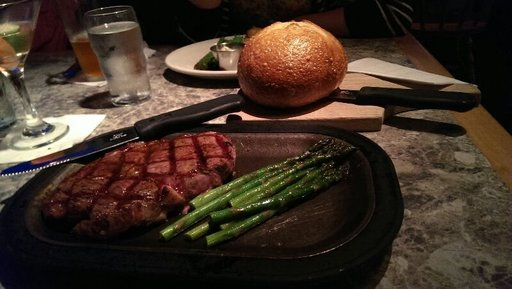

In [ ]:
import random
from PIL import Image

# random.seed(42)

#Get all image paths
image_path_list = list(image_path.glob("*/*/*.jpg"))

#pick a random image payh
random_image_path = random.choice(image_path_list)
print(random_image_path)

#get image class from path name
image_class = random_image_path.parent.stem
print(image_class)

#open image
img = Image.open(random_image_path)

#print metadata
print(f"Random image path : {random_image_path}")
print(f"Image class : {image_class}")
print(f"Image height : {img.height}")
print(f"image width : {img.width}")
img



Text(0.5, 1.0, 'image class: steak | Image shape : (289, 512, 3)')

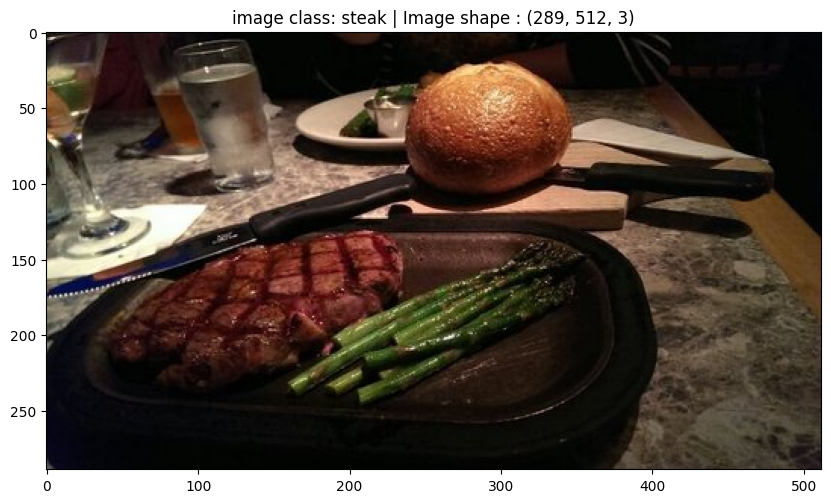

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#turn the image into an array
img_as_array = np.asarray(img)

#plot the image with matplotlib
plt.figure(figsize=(10,7))
plt.imshow(img_as_array)
plt.title(f"image class: {image_class} | Image shape : {img_as_array.shape}")

array([[[ 29,  20,  15],
        [ 34,  25,  20],
        [ 31,  22,  17],
        ...,
        [  3,   4,   9],
        [  3,   4,   9],
        [  3,   4,   9]],

       [[ 33,  24,  19],
        [ 36,  27,  22],
        [ 34,  25,  20],
        ...,
        [  3,   4,   9],
        [  3,   4,   9],
        [  3,   4,   9]],

       [[ 41,  34,  26],
        [ 35,  28,  20],
        [ 34,  25,  18],
        ...,
        [  3,   4,   9],
        [  3,   4,   9],
        [  3,   4,   9]],

       ...,

       [[ 83,  84,  89],
        [ 76,  77,  82],
        [ 60,  60,  70],
        ...,
        [ 39,  30,  33],
        [ 42,  33,  36],
        [ 45,  36,  39]],

       [[ 80,  79,  84],
        [ 90,  89,  94],
        [ 88,  87,  93],
        ...,
        [ 32,  23,  26],
        [ 34,  25,  30],
        [ 38,  32,  34]],

       [[ 89,  88,  86],
        [ 92,  90,  91],
        [ 99,  97, 100],
        ...,
        [ 31,  25,  29],
        [ 36,  29,  36],
        [ 41,  36,  40]]], dtype=uint8)
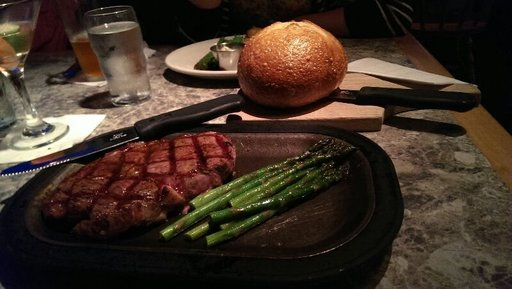

In [ ]:
img_as_array

## 3. Transforming data

1. Turn your target data into tensors (numerical represantation of our images)
2. Turn it into a 'torch.utils.data.dataset' and subsequently a dataloader

In [ ]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [ ]:
data_transform = transforms.Compose([
    #Resize our image
    transforms.Resize(size=(64,64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])

In [ ]:
data_transform(img)

tensor([[[0.2275, 0.1843, 0.1686,  ..., 0.0196, 0.0157, 0.0118],
         [0.2353, 0.1686, 0.1686,  ..., 0.0196, 0.0118, 0.0118],
         [0.1412, 0.1882, 0.1882,  ..., 0.0157, 0.0078, 0.0078],
         ...,
         [0.0353, 0.0275, 0.0196,  ..., 0.1765, 0.1373, 0.1725],
         [0.0510, 0.0275, 0.0196,  ..., 0.1922, 0.1529, 0.1451],
         [0.1333, 0.0353, 0.0275,  ..., 0.2353, 0.1569, 0.1451]],

        [[0.1961, 0.1451, 0.1137,  ..., 0.0235, 0.0196, 0.0157],
         [0.2039, 0.1216, 0.1137,  ..., 0.0235, 0.0157, 0.0157],
         [0.1098, 0.1373, 0.1255,  ..., 0.0196, 0.0118, 0.0118],
         ...,
         [0.0314, 0.0235, 0.0196,  ..., 0.1451, 0.1059, 0.1412],
         [0.0471, 0.0235, 0.0196,  ..., 0.1647, 0.1216, 0.1137],
         [0.1255, 0.0314, 0.0235,  ..., 0.2078, 0.1255, 0.1098]],

        [[0.1686, 0.1294, 0.1216,  ..., 0.0431, 0.0353, 0.0353],
         [0.1922, 0.1137, 0.1216,  ..., 0.0353, 0.0314, 0.0314],
         [0.1255, 0.1451, 0.1373,  ..., 0.0275, 0.0235, 0.

In [ ]:
# def plot_transformed_images(image_paths: list, transform, n=3, seed=None):
#   if seed:
#     random.seed(seed)
#   random_image_path = random.sample(image_paths, k=n)
#   for image_path in random_image_path:
#     with Image.open(image_path) as f:


In [ ]:
from torchvision import datasets
train_data = datasets.ImageFolder(root=train_dir,
                                  transform=data_transform,
                                  target_transform=None)



test_data = datasets.ImageFolder(root=test_dir,
                                 transform=data_transform)

train_data, test_data

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data/pizza_steak_sushi/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: data/pizza_steak_sushi/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ))

In [ ]:
class_names = train_data.classes
class_names

['pizza', 'steak', 'sushi']

In [ ]:
class_dict = train_data.class_to_idx
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [ ]:
#Rearrange the order dimensons
img, label = train_data[0][0], train_data[0][1]
#print out different shapes


In [ ]:
img_permute = img.permute(1,2,0)


### Turn loaded images into Dataloader

In [ ]:
import os
os.cpu_count()

2

In [ ]:
from torch.utils.data import DataLoader
BATCH_SIZE = 1
train_dataloader = DataLoader(dataset = train_data,
                              batch_size = BATCH_SIZE,
                              num_workers=1,
                              shuffle=True)
test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             num_workers=1,
                             shuffle=False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x797c33f83470>,
 <torch.utils.data.dataloader.DataLoader at 0x797c3ce367e0>)

In [ ]:
len(train_dataloader), len(test_dataloader)

(225, 75)

In [ ]:
img, label = next(iter(train_dataloader))

img.shape, label.shape

(torch.Size([1, 3, 64, 64]), torch.Size([1]))

### Optin 2: Loading Image Data with a Custom Dataset

In [ ]:
import os
import pathlib
import torch

from PIL import Image
from torch.utils.data import Dataset
from torchvision import transforms
from typing import Tuple, Dict, List

In [ ]:
train_data.classes, train_data.class_to_idx

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

In [ ]:
#5.1 Creating a helper function to get class name
target_directory = train_dir
print(f"Target dir:{target_directory} ")

class_names_found = sorted([entry.name for entry in list(os.scandir(target_directory))])
class_names_found

Target dir:data/pizza_steak_sushi/train 


['pizza', 'steak', 'sushi']

In [ ]:
def display_random_images(dataset: torch.utils.data.Dataset,
                          classes: List[str] = None,
                          n: int = 10,
                          display_shape: bool = True,
                          seed: int = None):
  if n > 10 :
    n= 10
    display_shape = False
    print(f"For display purposes, n shouldn't be greater than 10")
  if seed:
    random.seed(seed)
  random_samples_idx = random.sample(range(len(dataset)), k=n)

  plt.figure(figsize=(16, 8))
  for i, targ_sample in enumerate(random_samples_idx):
    targ_image, targ_label =dataset[targ_sample][0], dataset[targ_sample][1]

    targ_image_adjust = targ_image.permute(1, 2, 0)

    plt.subplot(1, n, i+1)
    plt.imshow(targ_image_adjust)
    plt.axis("off")
    if classes:
      title = f"Class : {classes[targ_label]}"
      if display_shape:
        title = title + f"\nshape : {targ_image_adjust.shape}"
    plt.title(title)

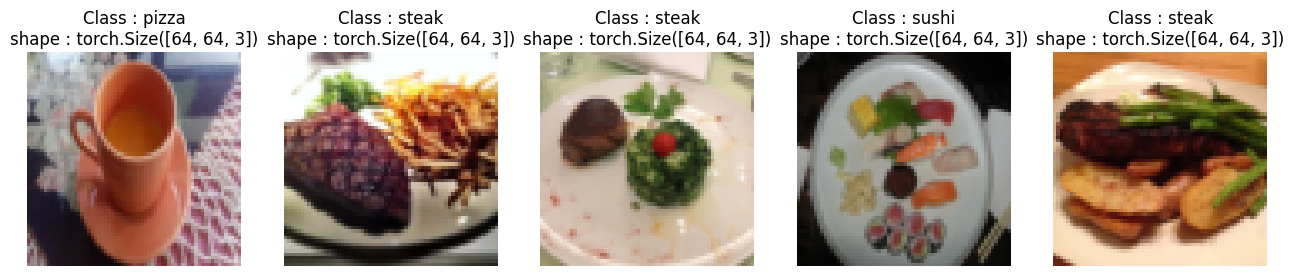

In [ ]:
display_random_images(train_data,
                      n=5,
                      classes=class_names,
                      seed=None)

## 6. Other forms of transform Data Augmention
Data augmentation is the process of artificially adding diversity of our dataset

In [ ]:
## Trivial Augment
from torchvision import transforms
train_transform = transforms.Compose([
    transforms.Resize(size=(224, 224)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31),
    transforms.ToTensor()
])

test_transform = transforms.Compose([
    transforms.Resize(size=(244, 244)),
    transforms.ToTensor()
])

In [ ]:
image_path_list[:10]

[PosixPath('data/pizza_steak_sushi/test/pizza/2218680.jpg'),
 PosixPath('data/pizza_steak_sushi/test/pizza/2871261.jpg'),
 PosixPath('data/pizza_steak_sushi/test/pizza/971934.jpg'),
 PosixPath('data/pizza_steak_sushi/test/pizza/930553.jpg'),
 PosixPath('data/pizza_steak_sushi/test/pizza/2508636.jpg'),
 PosixPath('data/pizza_steak_sushi/test/pizza/344397.jpg'),
 PosixPath('data/pizza_steak_sushi/test/pizza/1503858.jpg'),
 PosixPath('data/pizza_steak_sushi/test/pizza/1925494.jpg'),
 PosixPath('data/pizza_steak_sushi/test/pizza/194643.jpg'),
 PosixPath('data/pizza_steak_sushi/test/pizza/309892.jpg')]

### Model 0 : TinyVGG without data augumentation

In [ ]:
simple_transform = transforms.Compose([
    transforms.Resize(size=(64, 64)),
    transforms.ToTensor()
])

In [ ]:
from torchvision import datasets
train_data_simple = datasets.ImageFolder(root= train_dir,
                                         transform = simple_transform)
test_data_simple = datasets.ImageFolder(root = test_dir,
                                        transform=simple_transform)

import os
from torch.utils.data import DataLoader

BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()

train_dataloader_simple = DataLoader(
    dataset=train_data_simple,
    batch_size= BATCH_SIZE,
    shuffle=False,
    num_workers=NUM_WORKERS
)
test_dataloader_simple = DataLoader(
    dataset=test_data_simple,
    batch_size=BATCH_SIZE,
    shuffle = False,
    num_workers=NUM_WORKERS
)

In [ ]:
class TinyVGG(nn.Module):
  def __init__(self, input_shape:int, hidden_units:int, output_shape:int) -> None:
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=0),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=0),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,
                     stride=2)

    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=0),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=0),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,
                     stride=2)

    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units *13*13,
                  out_features=output_shape)
    )

  def forward(self, x):
    x = self.conv_block_1(x)
    # print(x.shape)
    x =self.conv_block_2(x)
    # print(x.shape)
    x = self.classifier(x)
    # print(x.shape)
    return x

In [ ]:
torch.manual_seed(42)
model_0 = TinyVGG(input_shape = 3, # number of color channels in our image data
                  hidden_units = 10,
                  output_shape=len(class_names)
                  ).to(device)
model_0

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1690, out_features=3, bias=True)
  )
)

###7.3 Try a forward pass on a single image(to test the model)

In [ ]:
#Get a single image batch
image_batch, label_batch = next(iter(train_dataloader_simple))
image_batch.shape, label_batch.shape

(torch.Size([32, 3, 64, 64]), torch.Size([32]))

In [ ]:
model_0(image_batch.to(device))

tensor([[ 1.7012e-02, -5.3149e-03,  1.2772e-02],
        [ 1.8558e-02, -1.8290e-03,  9.5356e-03],
        [ 2.1909e-02, -4.9545e-03,  9.4220e-03],
        [ 2.3536e-02, -5.1556e-03,  1.0510e-02],
        [ 2.1787e-02,  6.3863e-05,  7.6013e-03],
        [ 2.0530e-02, -1.1189e-03,  1.1084e-02],
        [ 2.1927e-02, -1.7779e-03,  8.1963e-03],
        [ 2.0188e-02, -2.4430e-03,  1.0628e-02],
        [ 2.2015e-02, -1.4427e-03,  7.8839e-03],
        [ 2.1256e-02, -1.6102e-03,  9.5531e-03],
        [ 1.9500e-02, -2.4018e-03,  8.3024e-03],
        [ 2.1457e-02, -1.8471e-03,  7.7899e-03],
        [ 2.0759e-02,  1.9331e-04,  7.7705e-03],
        [ 2.1412e-02, -1.9498e-03,  1.2461e-02],
        [ 1.8300e-02,  1.5043e-03,  1.0491e-02],
        [ 2.2685e-02, -2.1673e-03,  9.2847e-03],
        [ 2.3170e-02, -1.5725e-03,  8.5609e-03],
        [ 2.0840e-02, -1.9240e-03,  9.4237e-03],
        [ 2.2364e-02, -1.1584e-03,  7.3214e-03],
        [ 2.3398e-02, -3.6900e-03,  1.0476e-02],
        [ 2.4240e-02

In [ ]:
pip install torchinfo

In [ ]:
from torchinfo import summary
summary(model_0, input_size = [1,3,64,64])




Layer (type:depth-idx)                   Output Shape              Param #
TinyVGG                                  [1, 3]                    --
├─Sequential: 1-1                        [1, 10, 30, 30]           --
│    └─Conv2d: 2-1                       [1, 10, 62, 62]           280
│    └─ReLU: 2-2                         [1, 10, 62, 62]           --
│    └─Conv2d: 2-3                       [1, 10, 60, 60]           910
│    └─ReLU: 2-4                         [1, 10, 60, 60]           --
│    └─MaxPool2d: 2-5                    [1, 10, 30, 30]           --
├─Sequential: 1-2                        [1, 10, 13, 13]           --
│    └─Conv2d: 2-6                       [1, 10, 28, 28]           910
│    └─ReLU: 2-7                         [1, 10, 28, 28]           --
│    └─Conv2d: 2-8                       [1, 10, 26, 26]           910
│    └─ReLU: 2-9                         [1, 10, 26, 26]           --
│    └─MaxPool2d: 2-10                   [1, 10, 13, 13]           --
├─Sequentia

In [ ]:
##7.5 Create train and test loops functions

def train_step(model : torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn : torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               device=device):
  # Put the model in train mode
  model.train()

  # Setup train loss and train accuracy values
  train_loss, train_acc = 0, 0

  #loop through data loader batches
  for batch, (X, y) in enumerate(dataloader):
    X, y = X.to(device), y.to(device)

    #1. Forward pass
    y_pred = model(X)

    #2. Clculate the loss
    loss = loss_fn(y_pred, y)
    train_loss += loss.item()

    #3. Optimizer zero grad
    optimizer.zero_grad()

    #4. Loss backward
    loss.backward()

    #5. optimizer step
    optimizer.step()

    #calculate accuracy metric
    y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
    train_acc += (y_pred_class == y).sum().item()/len(y_pred)

    #Adjust metric to get average loss and accuracy per batch
  train_loss = train_loss/ len(dataloader)
  train_acc = train_acc/ len(dataloader)
  return train_loss, train_acc

In [ ]:
def test_step(model:torch.nn.Module,
              dataloader:torch.utils.data.DataLoader,
              loss_fn:torch.nn.Module,
              device=device):
  #put model in eval mode
  model.eval()

  test_loss, test_acc = 0,0

  with torch.inference_mode():
    for batch, (X,y) in enumerate(dataloader):
      X, y = X.to(device), y.to(device)

      test_pred_logits = model(X)

      loss = loss_fn(test_pred_logits, y)
      test_loss += loss.item()

      test_pred_labels = test_pred_logits.argmax(dim=1)
      test_acc += (test_pred_labels == y).sum().item()/len(test_pred_labels)

    test_loss = test_loss / len(dataloader)
    test_acc = test_acc / len(dataloader)
    return test_loss, test_acc

In [ ]:
from tqdm.auto import tqdm
def train(model: torch.nn.Module,
          train_dataloader:torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          optimizer: torch.optim.Optimizer,
          loss_fn : torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int = 5,
          device = device):
  #2. Create empy results dictionary
  results = {
      "train_loss" : [],
      "train_acc" : [],
      "test_loss" : [],
      "test_acc" : [] }

  for epoch in tqdm(range(epochs)):
    train_loss, train_acc = train_step(model=model,
                                       dataloader=train_dataloader,
                                       loss_fn=loss_fn,
                                       optimizer=optimizer,
                                       device=device)
    test_loss, test_acc = test_step(model=model,
                                    dataloader = test_dataloader,
                                    loss_fn=loss_fn,
                                    device=device)

    print(f"Epoch: {epoch} | Train loss : {train_loss:.4f} | Train acc:{train_acc: .4f} | Test loss : {test_loss: .4f} | Test acc {test_acc : .4f}")

    results["train_loss"].append(train_loss)
    results["train_acc"].append(train_acc)
    results["test_loss"].append(test_loss)
    results["test_acc"].append(test_acc)

  return results

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

NUM_EPOCHS = 5

model_0 = TinyVGG(input_shape=3,
                  hidden_units=10,
                  output_shape=len(train_data.classes)).to(device)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(),
                             lr=0.001)

from timeit import default_timer as timer
start_time = timer()
model_0_results = train(model = model_0,
                        train_dataloader = train_dataloader_simple,
                        test_dataloader = test_dataloader_simple,
                        optimizer = optimizer,
                        loss_fn = loss_fn,
                        epochs = NUM_EPOCHS)

end_time = timer()
print(f'Total training time : {end_time-start_time:.3f} seconds')

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0 | Train loss : 1.2148 | Train acc: 0.3047 | Test loss :  1.1588 | Test acc  0.2604
Epoch: 1 | Train loss : 1.1060 | Train acc: 0.3047 | Test loss :  1.1224 | Test acc  0.2604
Epoch: 2 | Train loss : 1.0976 | Train acc: 0.3047 | Test loss :  1.1027 | Test acc  0.2604
Epoch: 3 | Train loss : 1.0953 | Train acc: 0.3047 | Test loss :  1.0911 | Test acc  0.2604
Epoch: 4 | Train loss : 1.0944 | Train acc: 0.5312 | Test loss :  1.0834 | Test acc  0.5417
Total training time : 18.007 seconds


In [ ]:
model_0_results

{'train_loss': [1.2147916331887245,
  1.1059631332755089,
  1.0975945815443993,
  1.0952777117490768,
  1.0943959653377533],
 'train_acc': [0.3046875, 0.3046875, 0.3046875, 0.3046875, 0.53125],
 'test_loss': [1.1588221589724224,
  1.1224358876546223,
  1.102670431137085,
  1.0911359786987305,
  1.0834365288416545],
 'test_acc': [0.2604166666666667,
  0.2604166666666667,
  0.2604166666666667,
  0.2604166666666667,
  0.5416666666666666]}

In [ ]:
## Create a transform with data augmentation
from torchvision import transforms
train_transforms_trivial = transforms.Compose([transforms.Resize(size=(64,64)),
                                               transforms.TrivialAugmentWide(num_magnitude_bins=31),
                                               transforms.ToTensor()

                                               ])
test_transform_simple = transforms.Compose([transforms.Resize(size=(64,64)),
                                            transforms.ToTensor()
                                            ])

In [ ]:
from torchvision import datasets
train_data_augumented = datasets.ImageFolder(root = train_dir,
                                             transform = train_transforms_trivial
    )
test_data_simple = datasets.ImageFolder(root=test_dir,
                                        transform=test_transform_simple)


In [ ]:
#turn data sets into dataloaders
import os
BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()

train_dataloader_augmented = DataLoader(dataset = train_data_augumented,
                                        batch_size=BATCH_SIZE,
                                        shuffle = True,
                                        num_workers=NUM_WORKERS)

test_dataloader_simple = DataLoader(dataset=test_data_simple,
                                    batch_size=BATCH_SIZE,
                                    shuffle=False,
                                    num_workers=NUM_WORKERS)

In [ ]:
model_1 = TinyVGG(input_shape=3,
                  hidden_units=10,
                  output_shape = len(train_data_augumented.classes)).to(device)
model_1

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1690, out_features=3, bias=True)
  )
)

In [ ]:
NUM_EPOCHS = 5
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_1.parameters(), lr = 0.001)

from timeit import default_timer as timer
start_time = timer()

model_1_results = train(model = model_1,
                        train_dataloader=train_dataloader_augmented,
                        test_dataloader=test_dataloader_simple,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=NUM_EPOCHS,
                        device=device)

end_time = timer()
print(f'Total training time : {end_time-start_time:.3f} seconds')

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0 | Train loss : 1.1122 | Train acc: 0.2734 | Test loss :  1.1110 | Test acc  0.2708
Epoch: 1 | Train loss : 1.1020 | Train acc: 0.3242 | Test loss :  1.0971 | Test acc  0.3902
Epoch: 2 | Train loss : 1.0947 | Train acc: 0.3984 | Test loss :  1.0991 | Test acc  0.2585
Epoch: 3 | Train loss : 1.1008 | Train acc: 0.2930 | Test loss :  1.0989 | Test acc  0.1979
Epoch: 4 | Train loss : 1.0902 | Train acc: 0.3008 | Test loss :  1.0963 | Test acc  0.2083
Total training time : 20.227 seconds


In [ ]:
model_1_results

{'train_loss': [1.1122132986783981,
  1.1020270735025406,
  1.0947145223617554,
  1.1007602214813232,
  1.0902259945869446],
 'train_acc': [0.2734375, 0.32421875, 0.3984375, 0.29296875, 0.30078125],
 'test_loss': [1.1109518607457478,
  1.0970502694447835,
  1.0990871985753377,
  1.0988809665044148,
  1.096293608347575],
 'test_acc': [0.2708333333333333,
  0.39015151515151514,
  0.2585227272727273,
  0.19791666666666666,
  0.20833333333333334]}

In [ ]:
import pandas as pd
model_0_df = pd.DataFrame(model_0_results)
model_1_df = pd.DataFrame(model_1_results)
model_0_df

,train_loss,train_acc,test_loss,test_acc
0,1.214792,0.304688,1.158822,0.260417
1,1.105963,0.304688,1.122436,0.260417
2,1.097595,0.304688,1.102670,0.260417
3,1.095278,0.304688,1.091136,0.260417
4,1.094396,0.531250,1.083437,0.541667


In [ ]:
model_1_df

,train_loss,train_acc,test_loss,test_acc
0,1.112213,0.273438,1.110952,0.270833
1,1.102027,0.324219,1.097050,0.390152
2,1.094715,0.398438,1.099087,0.258523
3,1.100760,0.292969,1.098881,0.197917
4,1.090226,0.300781,1.096294,0.208333


In [ ]:
# Download custom image
import requests

# Setup custom image path
custom_image_path = data_path / "04-pizza-dad.jpeg"

# Download the image if it doesn't already exist
if not custom_image_path.is_file():
    with open(custom_image_path, "wb") as f:
        # When downloading from GitHub, need to use the "raw" file link
        request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/04-pizza-dad.jpeg")
        print(f"Downloading {custom_image_path}...")
        f.write(request.content)
else:
    print(f"{custom_image_path} already exists, skipping download.")

In [ ]:
custom_image_path

PosixPath('data/04-pizza-dad.jpeg')

In [ ]:
import torchvision

#Read in custom image
custom_image_uint8 = torchvision.io.read_image(str(custom_image_path))
custom_image_uint8

tensor([[[154, 173, 181,  ...,  21,  18,  14],
         [146, 165, 181,  ...,  21,  18,  15],
         [124, 146, 172,  ...,  18,  17,  15],
         ...,
         [ 72,  59,  45,  ..., 152, 150, 148],
         [ 64,  55,  41,  ..., 150, 147, 144],
         [ 64,  60,  46,  ..., 149, 146, 143]],

        [[171, 190, 193,  ...,  22,  19,  15],
         [163, 182, 193,  ...,  22,  19,  16],
         [141, 163, 184,  ...,  19,  18,  16],
         ...,
         [ 55,  42,  28,  ..., 107, 104, 103],
         [ 47,  38,  24,  ..., 108, 104, 102],
         [ 47,  43,  29,  ..., 107, 104, 101]],

        [[119, 138, 147,  ...,  17,  14,  10],
         [111, 130, 145,  ...,  17,  14,  11],
         [ 87, 111, 136,  ...,  14,  13,  11],
         ...,
         [ 35,  22,   8,  ...,  52,  52,  48],
         [ 27,  18,   4,  ...,  50,  49,  44],
         [ 27,  23,   9,  ...,  49,  46,  43]]], dtype=torch.uint8)

In [ ]:
custom_image_uint8.shape

torch.Size([3, 4032, 3024])

In [ ]:
custom_image = custom_image_uint8.type(torch.float32)/255

In [ ]:
custom_image

tensor([[[0.6039, 0.6784, 0.7098,  ..., 0.0824, 0.0706, 0.0549],
         [0.5725, 0.6471, 0.7098,  ..., 0.0824, 0.0706, 0.0588],
         [0.4863, 0.5725, 0.6745,  ..., 0.0706, 0.0667, 0.0588],
         ...,
         [0.2824, 0.2314, 0.1765,  ..., 0.5961, 0.5882, 0.5804],
         [0.2510, 0.2157, 0.1608,  ..., 0.5882, 0.5765, 0.5647],
         [0.2510, 0.2353, 0.1804,  ..., 0.5843, 0.5725, 0.5608]],

        [[0.6706, 0.7451, 0.7569,  ..., 0.0863, 0.0745, 0.0588],
         [0.6392, 0.7137, 0.7569,  ..., 0.0863, 0.0745, 0.0627],
         [0.5529, 0.6392, 0.7216,  ..., 0.0745, 0.0706, 0.0627],
         ...,
         [0.2157, 0.1647, 0.1098,  ..., 0.4196, 0.4078, 0.4039],
         [0.1843, 0.1490, 0.0941,  ..., 0.4235, 0.4078, 0.4000],
         [0.1843, 0.1686, 0.1137,  ..., 0.4196, 0.4078, 0.3961]],

        [[0.4667, 0.5412, 0.5765,  ..., 0.0667, 0.0549, 0.0392],
         [0.4353, 0.5098, 0.5686,  ..., 0.0667, 0.0549, 0.0431],
         [0.3412, 0.4353, 0.5333,  ..., 0.0549, 0.0510, 0.

In [ ]:
custom_image_transform = transforms.Compose([
    transforms.Resize(size=(64,64))
])

custom_image_transformed = custom_image_transform(custom_image)

custom_image_transformed.shape

torch.Size([3, 64, 64])

In [ ]:
model_1.eval()
with torch.inference_mode():
  custom_image_pred = model_1(custom_image_transformed.to(device))

RuntimeError: mat1 and mat2 shapes cannot be multiplied (10x169 and 1690x3)

In [ ]:
model_1.eval()
with torch.inference_mode():
  custom_image_pred = model_1(custom_image_transformed.unsqueeze(0).to(device))

custom_image_pred

tensor([[ 0.0156,  0.0305, -0.0014]])

In [ ]:
class_names

['pizza', 'steak', 'sushi']

In [ ]:
custom_image_pred_probs = torch.softmax(custom_image_pred, dim=1)
custom_image_pred_probs

tensor([[0.3335, 0.3386, 0.3279]])

In [ ]:
custom_image_pred_label = torch.argmax(custom_image_pred_probs, dim=1)
custom_image_pred_label

tensor([1])

In [ ]:
class_names[custom_image_pred_label]

'steak'

In [ ]:
def pred_and_plot_image(model: torch.nn.Module,
                        image_path: str,
                        class_names: List[str] = None,
                        transform = None,
                        device= device):
